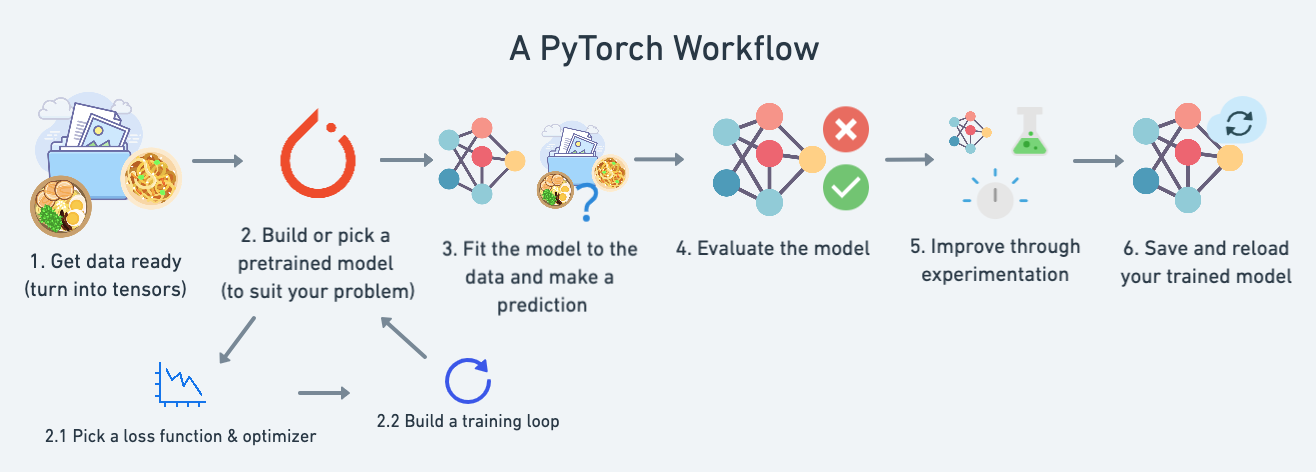

In [1]:
things_being_covered = {1:"data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predicitions and evaluting a model (inference)",
                        5: "putting it all together"}

things_being_covered

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predicitions and evaluting a model (inference)',
 5: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt
#check pytorch version
torch.__version__

'2.3.0+cu121'

### Data (preparing and loading)

Data can be almost anything... in machine learning.

* excel spreadsheet
* images of any kind
* videos (yt has lots of data)
* audio like songs or podcasts
* dna
* text


machine learning is a game of two parts
1. Get data into a numerical representions
2. build a model to learn patterns in that numerical representations

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# create *known* parameters

weight = 0.7
bias = 0.3


#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with the data

In [4]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

How might we better visiualize the data?

"Visualize,visualize,visualize"

In [37]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  '''
  plots training data, test data and compared predictions.
  '''

  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="training")

  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing")

   #Are there predictions?

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label='predictions')

  #show legend
  plt.legend(prop={"size":14})

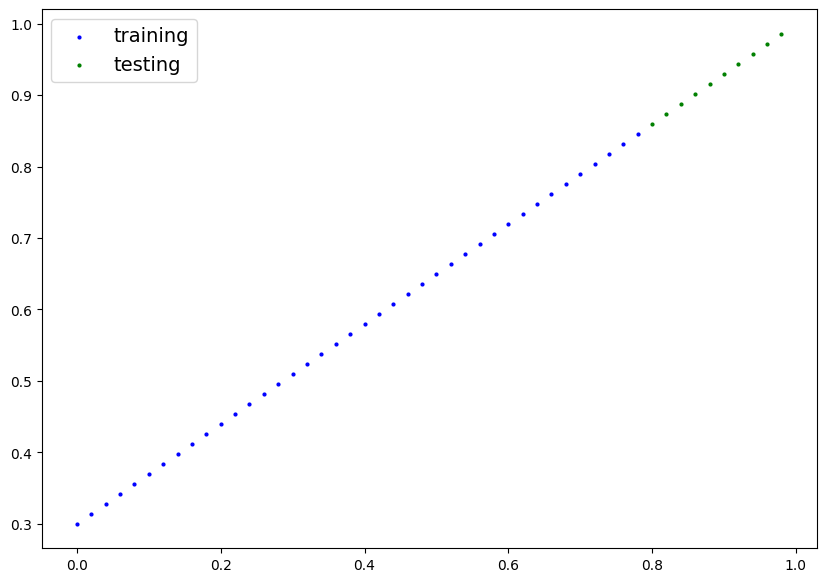

In [6]:
plot_predictions()

## 2. Building model

first pytorch model!

this is very exciting...

what the model does:
* start with random values (weight and bias)
* look at training data and adjust the random values to better represent (or get closer to) the ideal values (or get close to) the ideal values (the weight & bias values we used to create the data)


How does it do so?

2 Main algorthims:
1. Gradient Descent
2. Backpropagation

In [7]:
# creating linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    #forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor: # <- "x" is the input
    return self.weights * x + self.bias #this is the linear regression form


### Pytorch model building essentials
 * torch.nn - contains all of the building blocks for computational graphs (a neural a network can be considered a computational graph)
 * torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
 * torch.nn.Module - base class for all neural network modules, if you subject it, you should overwrite forward()
 * torch.optim - this is where the optimizers in Pytorch live, they will help gradient descent
 * def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happen in the forward computation


### Checking the contents of our Pytorch model

Now that a model has been created, let's see what's inside...

So we can check the model parameters or what's inside our model using .parameters()

In [8]:
# Creating a random seed

torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight,bias

(0.7, 0.3)

### Making prediction using `torch.inference_model()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it is going to run it through the `forward()`

In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
# make prediction with model

#can do the same with torch.no_grad() but inference_mode is prefered
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

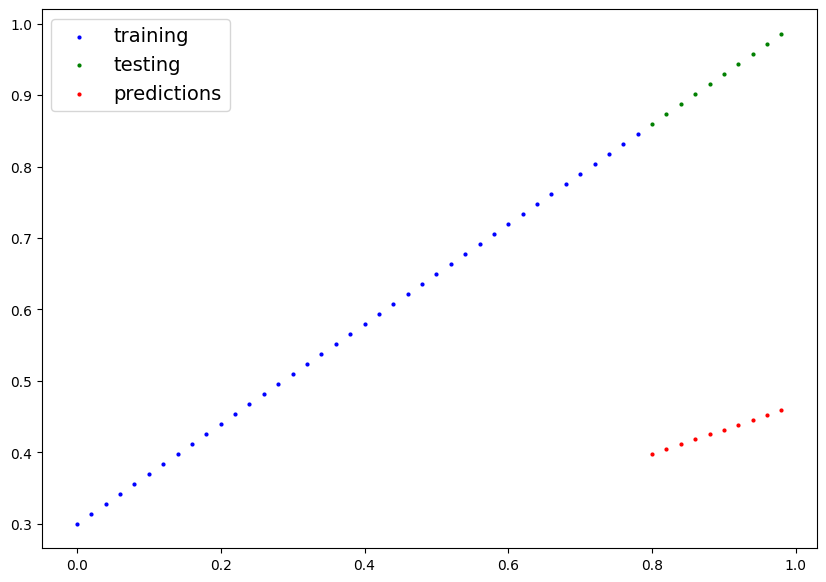

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters

or in other words, from a poor representaton of the data to a better representation of the data

One way to measure how poor or how wrong the models predictions are is to use a loss function

* Note: loss function == cost function == criterion

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)
  * Inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimizer, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a larger `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
# setup a loss function
loss_fn = nn.L1Loss()

#set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr = learning rate

### Building a training & testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do ...
1. Forward pass (this involves data moving through our model's `foward ()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backwards through the network to calculate the gradient of each of the params of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [15]:
# An epoch is one loop through the data...

torch.manual_seed(42)

epochs = 175

#track the models
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data

for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calc loss
  loss = loss_fn(y_pred,y_train)
  print(loss)

  # 3. Optimizer zero grad
  optimizer.zero_grad() # start fresh each iteration

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


  ### Testing
  model_0.eval() # this turns off different settings in the model not needing for evaluation/testing (dropput/ batchnorm)
  with torch.inference_mode(): # turns off gradient tracking & a couple of more things
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ')


    print(model_0.state_dict())




tensor(0.3129, grad_fn=<MeanBackward0>)
epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.2898, grad_fn=<MeanBackward0>)
tensor(0.2783, grad_fn=<MeanBackward0>)
tensor(0.2668, grad_fn=<MeanBackward0>)
tensor(0.2553, grad_fn=<MeanBackward0>)
tensor(0.2438, grad_fn=<MeanBackward0>)
tensor(0.2322, grad_fn=<MeanBackward0>)
tensor(0.2207, grad_fn=<MeanBackward0>)
tensor(0.2092, grad_fn=<MeanBackward0>)
tensor(0.1977, grad_fn=<MeanBackward0>)
epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
tensor(0.1862, grad_fn=<MeanBackward0>)
tensor(0.1746, grad_fn=<MeanBackward0>)
tensor(0.1631, grad_fn=<MeanBackward0>)
tensor(0.1516, grad_fn=<MeanBackward0>)
tensor(0.1401, grad_fn=<MeanBackward0>)
tensor(0.1285, grad_fn=<MeanBackward0>)
tensor(0.1170, grad_fn=<MeanBackw

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [17]:
weight,bias

(0.7, 0.3)

In [18]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

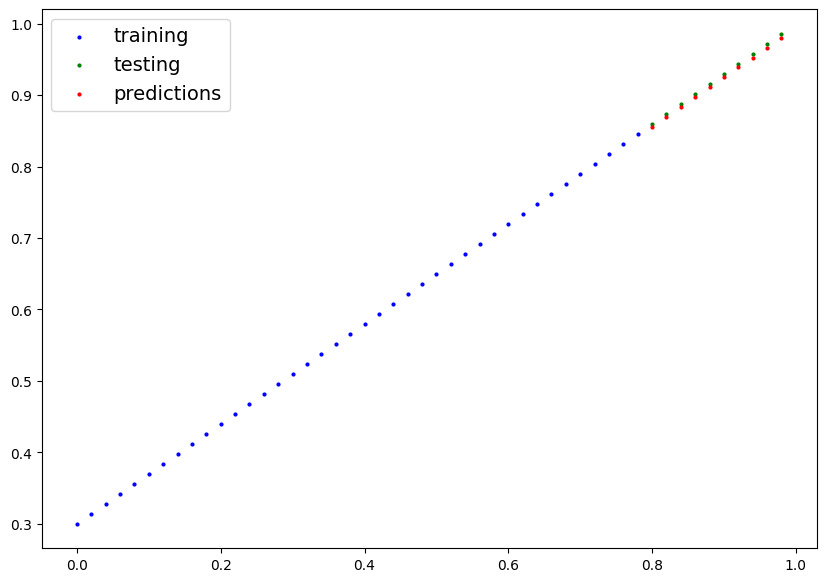

In [19]:
plot_predictions(predictions=y_preds_new)

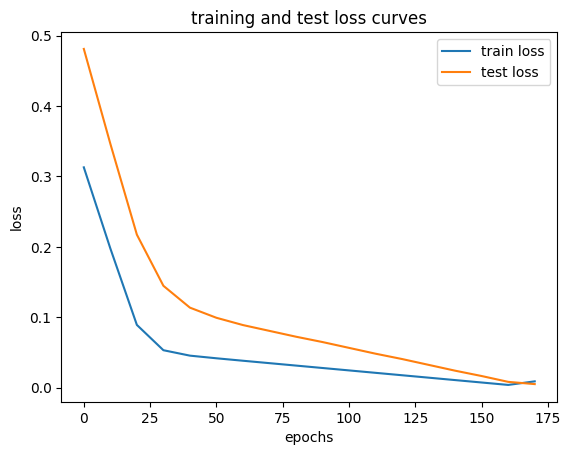

In [20]:
#plot tne loss curve
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

### Saving a model in PyTorch

there are 3 main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [22]:
# Saving our Pytorch model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2.  create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

 # 3. Save the model state dict
print(f'Saving model to : {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [23]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jun 23 01:31 01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the saves `state_dict()` into that.

In [24]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 ( this will update the new instance with updated params)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [26]:
# Make some predicitions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)


loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [27]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

let's go back through the steps above and see it all in one place

In [28]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.3.0+cu121'

Create device-agnostic code.

This means if we got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [31]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'using device: {device}')

using device: cuda


### 6.1 Data

In [58]:
# create some data using the linear regression formula of y = weight * X + bias

weight = 0.2
bias = 0.6

#crete range values

start = 0
end = 1
step = 0.02

# create X and y (features and label)

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.6000],
         [0.6040],
         [0.6080],
         [0.6120],
         [0.6160],
         [0.6200],
         [0.6240],
         [0.6280],
         [0.6320],
         [0.6360]]))

In [59]:
# split the data
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

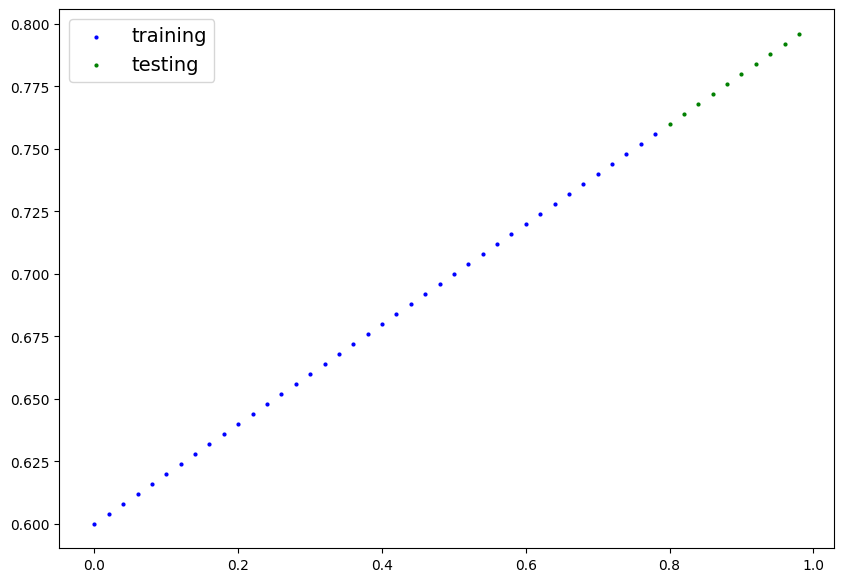

In [60]:
from os import X_OK
# plot the data
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 building a pytorch linear model

In [61]:
# Create a linear model using subclassing nn.model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters // also called linear transform, probing layer, fully conntected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [62]:
#check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [63]:
# set the model to use the target device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [64]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* optimizer
* training loop
* testing loop

In [65]:
# setup loss function
loss_fn = nn.L1Loss() #same as MAE

#setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [68]:
# let's write a training loop
torch.manual_seed(42)

epochs = 250

# put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()


  ### testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)


    # print what is happening

    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}')

Epoch: 0 | Loss: 0.006723831873387098 | test loss: 0.014693224802613258
Epoch: 10 | Loss: 0.003292124019935727 | test loss: 0.007107782643288374
Epoch: 20 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 30 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 40 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 50 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 60 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 70 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 80 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 90 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 100 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 110 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 120 | Loss: 0.003967978060245514 | test loss: 0.012097072787582874
Epoch: 130 | Loss: 0.003967978060245514 | test lo

In [67]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2335]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5860], device='cuda:0'))])

### 6.4 making and evaluating predictions

In [69]:
# turn model into evaluation mode
model_1.eval()

# making predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.7582],
        [0.7623],
        [0.7664],
        [0.7705],
        [0.7746],
        [0.7787],
        [0.7828],
        [0.7869],
        [0.7910],
        [0.7951]], device='cuda:0')

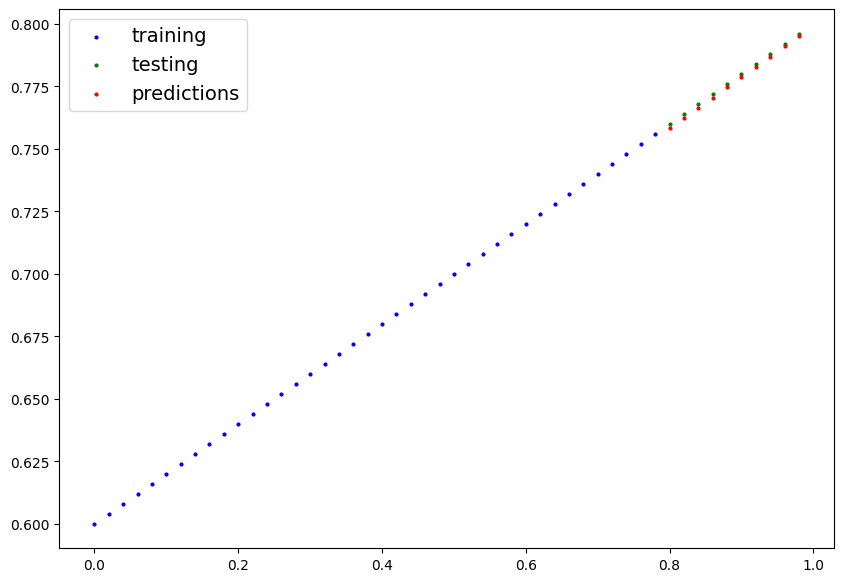

In [71]:
#checkout our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 saving and loading the model

In [73]:
from pathlib import Path
# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME='01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_1.pth


In [74]:
# load a pytorch model

#create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


#put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [76]:
next(loaded_model_1.parameters(

)).device

device(type='cuda', index=0)

In [77]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2052]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5940], device='cuda:0'))])

In [81]:
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds==loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')